<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using binary logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")
df

age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0

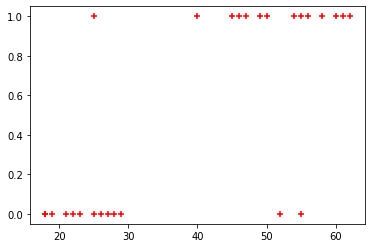

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8, random_state=1)

In [6]:
X_train

age
20   21
21   26
4    46
2    47
22   40
6    55
19   18
13   29
7    60
24   50
1    25
16   25
0    22
15   55
26   23
25   54
9    61
8    62
12   27
11   28
5    56

In [7]:
X_test

age
17   58
14   49
18   19
3    52
23   45
10   18

In [8]:
y_train

20    0
21    0
4     1
2     1
22    1
6     0
19    0
13    0
7     1
24    1
1     0
16    1
0     0
15    1
26    0
25    1
9     1
8     1
12    0
11    0
5     1
Name: bought_insurance, dtype: int64

In [9]:
y_test

17    1
14    1
18    0
3     0
23    1
10    0
Name: bought_insurance, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_predicted = model.predict(X_test)

In [13]:
y_predicted

array([1, 1, 0, 1, 1, 0], dtype=int64)

In [14]:
model.score(X_test,y_test)

0.8333333333333334

**model.coef_ indicates value of m in y=m*x + b equation**

In [15]:
model.coef_

array([[0.14617537]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [16]:
model.intercept_

array([-5.48985094])

In [19]:
model.predict([[60]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Lets defined sigmoid function now and do the math with hand**

In [20]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [21]:
def prediction_function(age):
    z = 0.14617537 * age -5.48985094
    y = sigmoid(z)
    #print(y)
    if y<0.5:
        return 0
    else:
        return 1

In [23]:
prediction_function(28)

0

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [ ]:
age = 43
prediction_function(age)

#model.predict([[age]])

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model